---
---
## Coursework 2 - Continuous Probability
---
---

Consider 20 random variables following a standard normal distribution $(X_1, . . . , X_{20})$ and perform the variable transformation $Y_i = X_i^2$. Identify the probability density function followed by the new variables $Y_i$. Construct a new random variable $Z=\sum^{20}_{i=1} Y_i$. Next, simulate the 20 variables $X_i$ and calculate the corresponding value of $Z$. Repeat this process 10,000 times and create a frequency histogram of $Z$. Compare the histogram with a chi-square distribution and another normal distribution with appropriate parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2, ncx2

seed = 123456789
rng = np.random.default_rng(seed=seed)

In [3]:
# Generamos 2000 variables aleatorias con distribución normal estándar
variables_aleatorias = np.random.normal(loc=0, scale=1, size=20)

# Calculamos la media y la varianza de la muestra
media_muestra = np.mean(variables_aleatorias)
varianza_muestra = np.var(variables_aleatorias)

print(variables_aleatorias)
print('media', media_muestra)
print('varianza', varianza_muestra)

[ 1.11750703 -0.50813091  0.28868411 -0.14861271  0.20423587  0.87919492
  0.18162814  0.41421167  2.24007648  1.7406845   0.3537367   1.22086366
  2.37829069  0.61864062  0.40657187 -0.67905399 -0.63538069 -0.20077576
 -1.07175042 -1.13137144]
media 0.38346251603795983
varianza 0.9446229901084301


### Pequeño chequeo: Hacemos un plot comparando el histograma de las variables generadas, con una distribución normal (con la media y varianza asociadas a las varibales aleatorias)

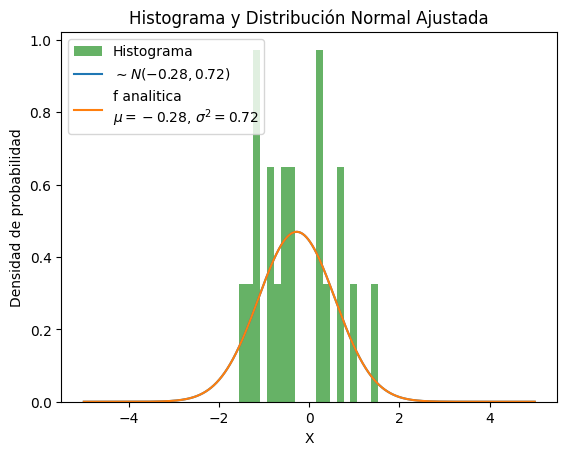

In [81]:
# Graficamos histograma de las variables aleatorias
plt.hist(variables_aleatorias, bins=20, density=True, alpha=0.6, color='g', label='Histograma')

# Generarmos valores de x para graficar la distribución normal
x = np.linspace(-5, 5, 1000)

# Calculamos la función de densidad de probabilidad (PDF) para los valores de x
pdf = norm.pdf(x,loc=media_muestra, scale=np.sqrt(varianza_muestra))  #dado que estamos solo sampleando 20 variables, la media y varianza no son 0 y 1, si fueran mas, estaria buen si directametne tomamos la estandar 0,1

# comparamos con la funcion analitica (puede que sea util para la inversion del cambio de var)
def pdf_normal(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2 / (2*sigma**2))

# Calculaamos la función de densidad de probabilidad (PDF) para los valores de x
pdf_analitica = pdf_normal(x, media_muestra, np.sqrt(varianza_muestra))

# Graficamos la distribución normal
plt.plot(x, pdf, label=f'$\sim N ({media_muestra.round(2)},{varianza_muestra.round(2)})$')

# Graficamos la distribución normal analitica
plt.plot(x, pdf_analitica, label=f'f analitica\n$\mu={media_muestra.round(2)}$, $\sigma^{2}={varianza_muestra.round(2)}$')
plt.xlabel('X')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Normal Ajustada')
plt.legend(loc='upper left')

# Mostramos la gráfica
plt.show()

### A continuacion, aplicamos el cambio de variables $Y=X^2$ y estudiamos qué distribucion sigue las nuevas variables.


<ipython-input-89-29a8d8f6d6ec>:33: RuntimeWarning: invalid value encountered in sqrt
  non_central_param = np.sqrt(media_muestra)


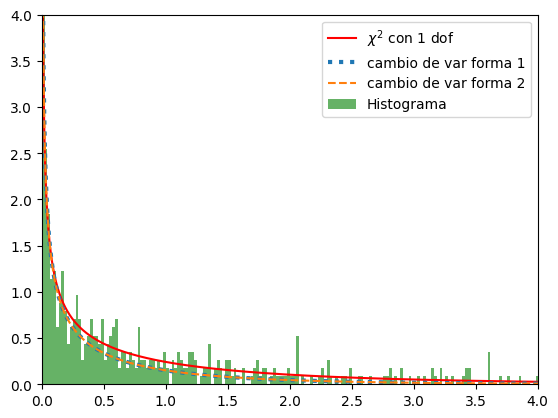

In [89]:
#primero ampliamos un poco el tamano de la muestra, para poder mejor la distribucion que sigue:

variables_aleatorias_chequeo = np.random.normal(loc=0, scale=1, size=500)


# Hago cambio de variablaes:
#y=x**2 --> g(y) = srqt(y)
y_al = variables_aleatorias_chequeo**2
#print(y_al)

# Calcular la media y la varianza de la muestra
media_y = np.mean(y_al)
varianza_y = np.var(y_al)
#print(media_y)
#print(varianza_y)

def pdf_normal(y, mu, sigma):
    ''' usando Fy(y)=fx(g^-1(y))*abs(dg^-1/dy)'''
    #gy = np.sqrt(y) --> dg_dy = 0.5*(y)**(-0.5)
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(np.sqrt(y) - mu)**2 / (2*sigma**2))*  2*abs(0.5/np.sqrt(y))  # hacemos la regla de la cadena

def pdf_normal_2(x, mu, sigma):
    '''uasndo Fy(y)=fx(x)1/abs(df/dx)'''
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-(x - mu)**2 / (2*sigma**2))*  2*abs(1/(2*x))  # Probamos con la ora forma vista en la teoria


#Notamos que al aplicar el cambio de variable y=x**2, la expresion de la funcion normal, se transforma en la de chi-cuadrado.
#hacemos plot para chequear que efectivamente, el histograma sigue una distribucion chi-cuadroado con un grado de libertad.
y = np.linspace(1e-5, 5, 1000)
pdf_analitica = pdf_normal(y, media_muestra, np.sqrt(varianza_muestra))

x = np.linspace(1e-5, 5, 1000)
non_central_param = np.sqrt(media_muestra)

pdf_chi2 = chi2.pdf(x, df=1, loc=0, scale=1)

pdf_analitica2 = pdf_normal_2(np.sqrt(x), media_muestra, np.sqrt(varianza_muestra))

plt.plot(x, pdf_chi2, color='r', label=r'$\chi^2$ con 1 dof')

plt.ylim(0,4)
plt.xlim(0,4)
# Graficar la distribución normal de y**2 y el histograma
plt.plot(y, pdf_analitica, label='cambio de var forma 1', ls=':', lw=3)
plt.plot(y, pdf_analitica2, label='cambio de var forma 2', ls='--')
plt.hist(y_al, bins=500, density=True, alpha=0.6, color='green', label='Histograma')
plt.legend()


### Construimos la nueva variable aleatoria $Z=\sum^{20}_{i=1} Y_i$. Simulamos las 20 variables $X_i$, las elevamos al cuadrado para obtener las $Y_i$ y calculamos el valor $Z$ correspondiente. Repetimos este proceso 10.000 veces y lo guardamos para luego hacer un histograma de frecuencias de $Z$.

In [83]:
# Repetimos 10000 veces la simulacion y sumamos sobre las 20 variables aleatorias cada vez.
n_var = 20
n_sim = 10000
variables_aleatorias = norm.rvs(size=[n_var, n_sim], random_state=rng)**2
Z = variables_aleatorias.sum(axis=0)

In [84]:
# Generamos los datos para hacer el histograma más prolijo
zmin, zmax = np.trunc(Z.min()), np.trunc(Z.max())+1 # rango de los datos del histograma
bin_edges = np.arange(zmin-0.5, zmax+1.5)           # bordes de los bins
nbins = len(bin_edges) - 1                          # número de bins
zbin = (bin_edges[:-1]+bin_edges[1:]) / 2           # posición de los bins (centro)
bin_width = bin_edges[1:] - bin_edges[:-1]          # ancho de los bins

### Comparamos con las distribuciones de chi-squared $(\chi^{2})$ y normal:

* Distribucion $\chi^{2}$ a comparar: como tenemos una suma sobre 20 variables normales elevadas al cuadrado, la distribución resultante es una chi-cuadrado con 20 grados de libertad.
Cuando tenemos una variable chi-cuadrado con k grados de libertad,  los momentos $E(Z)$ y $Var(Z)$ resultan $k$ y $2k$ respectivamente (en este caso, $20$ y $40$).
* Distribucion normal a comparar:  El teorema central del límite (TCL) indica que si una variable es la suma de N variables aleatorias independientes $X_i$ que siguen una distribución continua o discreta, y con media y varianza finitas $\mu_{i}, \sigma_{i}^2$,  entonces para valores grandes de $N$ la nueva distribucion se aproxima a una distribución normal, con media
$\mu = \sum_{i=i}^{N} \mu_{i}$
y varianza
$\sigma^2 = \sum_{i=i}^{N} \sigma_{i}^{2}$. En este caso, estamos sumando 20
variables $\chi^{2}$, que tienen $\mu=1$ y $\sigma^{2}=2$. Por lo tanto,
$\mu(Z)=20$ y $\sigma^{2}=40$


In [85]:
# Generamos la variable z para calcular la densidad de probabilidad con las distribuciones teóricas y comparar
z = np.linspace(0, zmax, num=1000)

# Distribucion de chi-cuadrado a comparar:
# como tenemos una suma sobre 20 variables, tenemos 20 grados de libertad para el chi-square
pdf_chi2 = chi2.pdf(z, df=n_var) # Función de densidad de probabilidad (PDF)
# Acá saqué loc y scale porque es el valor por defecto


# Distribucion normal con media k y varianza 2k, siendo k los dof, que coincide
# con el número de variables aleatorias normales estándas que se suman
pdf_normal = norm.pdf(z, loc=n_var, scale=np.sqrt(2*n_var))  # Función de densidad de probabilidad (PDF)

### Graficamos el histograma de frecuencias de Z

(0.0, 54.95)

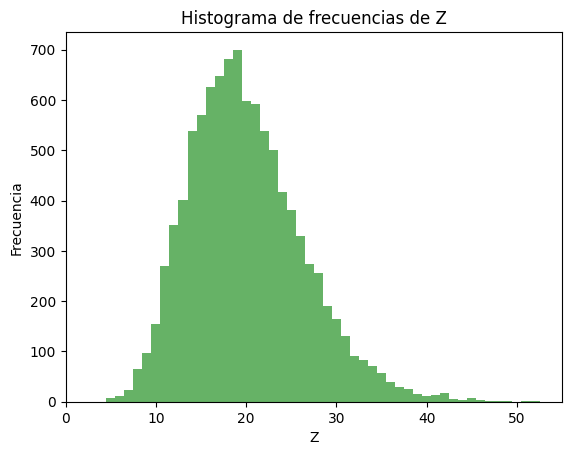

In [86]:
plt.hist(Z, bins=bin_edges, density=False, alpha=0.6, color='g', label='Histograma de frecuencias de Z')
plt.title('Histograma de frecuencias de Z')
plt.xlabel('Z')
plt.ylabel('Frecuencia')
plt.xlim(left=0)

# Graficamos el histograma y las dos distribuciones teóricas para comparar

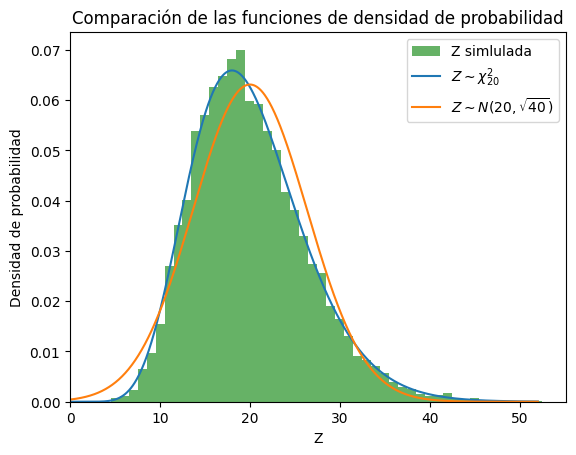

In [87]:
plt.hist(Z, bins=bin_edges, density=True, alpha=0.6, color='g', label='Z simlulada')
# chi square df=20, y normal usando TCL (suma de medias y varianzas).
plt.plot(z, pdf_chi2, label='$Z \sim \chi^{2}_{20}$')
plt.plot(z, pdf_normal, label='$Z \sim N(20, \sqrt{40})$')
plt.title('Comparación de las funciones de densidad de probabilidad')
plt.xlabel('Z')
plt.ylabel('Densidad de probabilidad')
plt.xlim(left=0)
plt.legend()


Se puede observar que la distribución chi-cuadrado con 20 grados de libertad se ajusta muy bien a los datos simulados, mientras que con la distribución normal utilizada el acuerdo es menor. Esto puede deberse a que el número de variables aleatorias que se sumaron no es suficientemente grande (un valor usualmente considerado es $N=30$ para que haya una buena aproximación).